In [2]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
import os
import json

     label      value model
7165    s2  14.567473  lcmv
7166    s2   4.251790  lcmv
7167    s2   4.931290  lcmv
7168    s2  13.235192  lcmv
7169    s2   7.191300  lcmv
...    ...        ...   ...
9492    s5  30.833346    ct
9493    s5  18.459278    ct
9494    s5  20.128663    ct
9495    s5   6.621312    ct
9496    s5   9.176250    ct

[1778 rows x 3 columns]
single source
wmse mle mean:  24.159586894006473  wmse mle sd:  7.392998290113627
rmse mle mean:  22.4432340352366  rmse mle sd:  7.239921373051361
whd mle mean:  33.238060266991  whd mle sd:  6.281308590279812
ct mle mean:  18.925809302415185  ct mle sd:  7.797576803727956
eloreta mle mean:  17.118703644933547  eloreta mle sd:  7.472814708250023
lcmv mle mean:  16.8057812693308  lcmv mle sd:  7.066280935883873


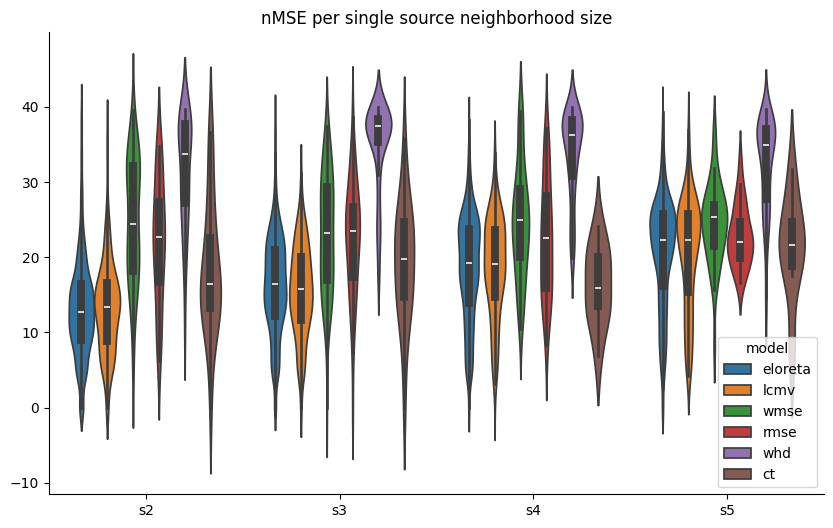

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

population = list(range(14000))

# 2. Sample 1000 unique points
sample_size = 1000
sampled_points = random.sample(population, sample_size)


metric_save_path_eLORETA = "/mnt/data/convdip/eLORETA_evaluation_metrics.json"
metric_save_path_LCMV = "/mnt/data/convdip/LCMV_evaluation_metrics.json"
metric_save_path_wmse = "/mnt/data/convdip/model/convdip_run7/evaluation_metrics.json"
metric_save_path_rmse = "/mnt/data/convdip/model/convdip_run6/evaluation_metrics.json"
metric_save_path_ct = "/mnt/data/convdip/model/convdip_run4/evaluation_metrics_ct140.json"
metric_save_path_whd = "/mnt/data/convdip/model/convdip_run4/evaluation_metrics_whd20.json"

data_path = "/mnt/data/convdip/training_data/"

with open(metric_save_path_eLORETA, 'r') as json_file:
    metrics_eloreta = json.load(json_file)

with open(metric_save_path_LCMV, 'r') as json_file:
    metrics_LCMV = json.load(json_file)

with open(metric_save_path_wmse, 'r') as json_file:
    metrics_wmse = json.load(json_file)

with open(metric_save_path_rmse, 'r') as json_file:
    metrics_rmse = json.load(json_file)

with open(metric_save_path_ct, 'r') as json_file:
    metrics_ct = json.load(json_file)

with open(metric_save_path_whd, 'r') as json_file:
    metrics_whd = json.load(json_file)
    
sim_info = pd.read_pickle(os.path.join(data_path, 'simulation_info.pkl')).reset_index()
sim_info.head()
test_info = sim_info.iloc[[int(key) for key in list(metrics_eloreta.keys())]]
del sim_info
test_info.loc[[69081]]

single_sources = test_info.loc[test_info['number_of_sources'] == 1]
single_sources

s2 = single_sources.loc[single_sources['extents'].str[0] < 30]
s3 = single_sources[single_sources['extents'].apply(lambda x: x[0] > 30 and x[0]<40)]
s4 = single_sources[single_sources['extents'].apply(lambda x: x[0] > 40 and x[0]<50)]
s5 = single_sources[single_sources['extents'].apply(lambda x: x[0] > 50 and x[0]<60)]

nbhd_sizes = {"s2": s2, "s3": s3, "s4": s4,"s5": s5}

data_eloreta = []
data_lcmv = []
data_wmse = []
data_rmse = []
data_ct = []
data_whd = []

average_auc = lambda x: 0.5*(x[0] + x[1])
md = {"auc": 0, "mle": 1, "mse": 2, "nmse": 3}
metric = "mle"

for key, nbhd_size in nbhd_sizes.items():
    for index, row in nbhd_size.iterrows():
        if metric == "auc":
            data_eloreta.append([key, average_auc(metrics_eloreta[str(index)]), 'eloreta'])
            if str(index) in metrics_LCMV.keys():
                data_lcmv.append([key, average_auc(metrics_LCMV[str(index)]), 'lcmv'])
        else:
            data_eloreta.append([key, metrics_eloreta[str(index)][md[metric]+1], 'eloreta'])
            if str(index) in metrics_LCMV.keys():
                data_lcmv.append([key, metrics_LCMV[str(index)][md[metric]+1], 'lcmv'])

        if str(index) in metrics_wmse.keys() and metrics_wmse[str(index)][0]:
            data_wmse.append([key, metrics_wmse[str(index)][md[metric]], 'wmse'])
        if str(index) in metrics_rmse.keys() and metrics_rmse[str(index)][0]:
            data_rmse.append([key, metrics_rmse[str(index)][md[metric]], 'rmse'])
        if str(index) in metrics_ct.keys() and metrics_ct[str(index)][0]:
            data_ct.append([key, metrics_ct[str(index)][md[metric]], 'ct'])
        if str(index) in metrics_whd.keys() and metrics_whd[str(index)][0]:
            data_whd.append([key, metrics_whd[str(index)][md[metric]], 'whd'])

df = pd.DataFrame(data_eloreta + data_lcmv + data_wmse + data_rmse + data_whd + data_ct,
                  columns=['label', 'value', 'model'])

print(df[(df['value'] > 0.9) & (df['model'] != 'eloreta')])
print("single source")
print(f"wmse {metric} mean: ", df.where(df['model'] == 'wmse')['value'].mean(), f" wmse {metric} sd: ", df.where(df['model'] == 'wmse')['value'].std())
print(f"rmse {metric} mean: ", df.where(df['model'] == 'rmse')['value'].mean(), f" rmse {metric} sd: ", df.where(df['model'] == 'rmse')['value'].std())
print(f"whd {metric} mean: ", df.where(df['model'] == 'whd')['value'].mean(), f" whd {metric} sd: ", df.where(df['model'] == 'whd')['value'].std())
print(f"ct {metric} mean: ", df.where(df['model'] == 'ct')['value'].mean(), f" ct {metric} sd: ", df.where(df['model'] == 'ct')['value'].std())
print(f"eloreta {metric} mean: ", df.where(df['model'] == 'eloreta')['value'].mean(), f" eloreta {metric} sd: ", df.where(df['model'] == 'eloreta')['value'].std())
print(f"lcmv {metric} mean: ", df.where(df['model'] == 'lcmv')['value'].mean(), f" lcmv {metric} sd: ", df.where(df['model'] == 'lcmv')['value'].std())


fig, ax = plt.subplots(figsize=(10, 6))
plt.title("nMSE per single source neighborhood size")
sns.violinplot(data=df, x='label', y='value', hue='model', ax=ax, cut=2)
ax.set(xlabel='', ylabel='')  # remove labels set by seaborn
sns.despine()
plt.show()

multisource
wmse nmse mean:  0.34999937381215734  wmse nmse sd:  0.060013907978205404
rmse nmse mean:  0.23984570813684306  rmse nmse sd:  0.0465574035233411
whd nmse mean:  0.024864520084999193  whd nmse sd:  0.022695639964316464
ct nmse mean:  0.09994972841686568  ct nmse sd:  0.026305279967032576
eloreta nmse mean:  0.05820785778234323  eloreta nmse sd:  0.034018481258950406
lcmv nmse mean:  0.0651224599892539  lcmv nmse sd:  0.034087232719203706


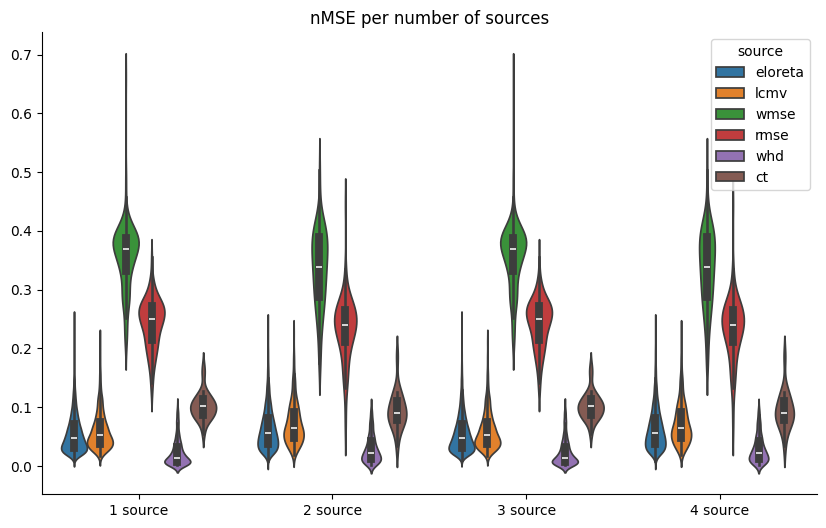

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

population = list(range(14000))

# 2. Sample 1000 unique points
sample_size = 1000
sampled_points = random.sample(population, sample_size)


metric_save_path_eLORETA = "/mnt/data/convdip/eLORETA_evaluation_metrics.json"
metric_save_path_LCMV = "/mnt/data/convdip/LCMV_evaluation_metrics.json"
metric_save_path_wsme = "/mnt/data/convdip/model/convdip_run7/evaluation_metrics.json"
metric_save_path_rsme = "/mnt/data/convdip/model/convdip_run6/evaluation_metrics.json"
metric_save_path_run4_ct = "/mnt/data/convdip/model/convdip_run4/evaluation_metrics_ct140.json"
metric_save_path_run4_whd = "/mnt/data/convdip/model/convdip_run4/evaluation_metrics_whd20.json"

data_path = "/mnt/data/convdip/training_data/"

with open(metric_save_path_eLORETA, 'r') as json_file:
    metrics_eloreta = json.load(json_file)

with open(metric_save_path_LCMV, 'r') as json_file:
    metrics_LCMV = json.load(json_file)

with open(metric_save_path_wsme, 'r') as json_file:
    metrics_wsme = json.load(json_file)

with open(metric_save_path_rsme, 'r') as json_file:
    metrics_rsme = json.load(json_file)

with open(metric_save_path_run4_ct, 'r') as json_file:
    metrics_run4_ct = json.load(json_file)

with open(metric_save_path_run4_whd, 'r') as json_file:
    metrics_run4_whd = json.load(json_file)

sim_info = pd.read_pickle(os.path.join(data_path, 'simulation_info.pkl')).reset_index()
sim_info.head()
test_info = sim_info.iloc[[int(key) for key in list(metrics_eloreta.keys())]]
del sim_info
test_info.loc[[69081]]

sources1 = test_info.loc[test_info['number_of_sources'] == 1]
sources2 = test_info.loc[test_info['number_of_sources'] == 2]
sources3 = test_info.loc[test_info['number_of_sources'] == 3]
sources4 = test_info.loc[test_info['number_of_sources'] == 4]
sources5 = test_info.loc[test_info['number_of_sources'] == 5]

source_nums = {"1 source": sources1, "2 source": sources2,
               "3 source": sources1, "4 source": sources2, "5 source": sources5 }

data_eloreta = []
data_lcmv = []
data_wmse = []
data_rmse = []
data_ct = []
data_whd = []

average_auc = lambda x: 0.5*(x[0] + x[1])
md = {"auc": 0, "mle": 1, "mse": 2, "nmse": 3}
metric = "nmse"

for key, source_num in source_nums.items():
    for index, row in source_num.iterrows():
        if metric == "auc":
            data_eloreta.append([key, average_auc(metrics_eloreta[str(index)]), 'eloreta'])
            if str(index) in metrics_LCMV.keys():
                data_lcmv.append([key, average_auc(metrics_LCMV[str(index)]), 'lcmv'])
        else:
            data_eloreta.append([key, metrics_eloreta[str(index)][md[metric]+1], 'eloreta'])
            if str(index) in metrics_LCMV.keys():
                data_lcmv.append([key, metrics_LCMV[str(index)][md[metric]+1], 'lcmv'])

        if str(index) in metrics_wsme.keys() and metrics_wsme[str(index)][0]:
            data_wmse.append([key, metrics_wsme[str(index)][md[metric]], 'wmse'])
        if str(index) in metrics_rsme.keys() and metrics_rsme[str(index)][0]:
            data_rmse.append([key, metrics_rsme[str(index)][md[metric]], 'rmse'])
        if str(index) in metrics_run4_ct.keys() and metrics_run4_ct[str(index)][0]:
            data_ct.append([key, metrics_run4_ct[str(index)][md[metric]], 'ct'])
        if str(index) in metrics_run4_whd.keys() and metrics_run4_whd[str(index)][0]:
            data_whd.append([key, metrics_run4_whd[str(index)][md[metric]], 'whd'])

df = pd.DataFrame(data_eloreta + data_lcmv + data_wmse + data_rmse + data_whd + data_ct,
                  columns=['label', 'value', 'source'])
print("multisource")
print(f"wmse {metric} mean: ", df.where(df['source'] == 'wmse')['value'].mean(), f" wmse {metric} sd: ", df.where(df['source'] == 'wmse')['value'].std())
print(f"rmse {metric} mean: ", df.where(df['source'] == 'rmse')['value'].mean(), f" rmse {metric} sd: ", df.where(df['source'] == 'rmse')['value'].std())
print(f"whd {metric} mean: ", df.where(df['source'] == 'whd')['value'].mean(), f" whd {metric} sd: ", df.where(df['source'] == 'whd')['value'].std())
print(f"ct {metric} mean: ", df.where(df['source'] == 'ct')['value'].mean(), f" ct {metric} sd: ", df.where(df['source'] == 'ct')['value'].std())
print(f"eloreta {metric} mean: ", df.where(df['source'] == 'eloreta')['value'].mean(), f" eloreta {metric} sd: ", df.where(df['source'] == 'eloreta')['value'].std())
print(f"lcmv {metric} mean: ", df.where(df['source'] == 'lcmv')['value'].mean(), f" lcmv {metric} sd: ", df.where(df['source'] == 'lcmv')['value'].std())

fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(data=df, x='label', y='value', hue='source',  ax=ax, cut=2)
plt.title("nMSE per number of sources")
ax.set(xlabel='', ylabel='')  # remove labels set by seaborn
sns.despine()
plt.show()